In [7]:
import pandas as pd
from collections import Counter
from ast import literal_eval
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns_names = ['date', 'language', 'mentions', 'n_retweets', 'user_id', 'tweet', 'type', 'retweeted_to_id', 'quoted_i']
cols = [2, 3, 4, 7, 8, 10, 12, 13, 14]
data = pd.read_csv('data/jan18_data.csv', usecols=cols, names=columns_names)

In [3]:
data.head()

,date,language,mentions,n_retweets,user_id,tweet,type,retweeted_to_id,quoted_i
0,2021-12-09 10:56:06,it,{'urls': [{'start': 26; 'end': 49; 'url': 'htt...,{'retweet_count': 0; 'reply_count': 0; 'like_c...,855904725652451330,Croce Rossa della Italia: https://t.co/lbnBTjx...,\N,\N,\N
1,2021-12-09 10:56:06,it,{'mentions': [{'start': 0; 'end': 13; 'usernam...,{'retweet_count': 0; 'reply_count': 0; 'like_c...,2346647000,@annibale1962 @IULIUSAGRICOLA @distefanoTW @br...,[{'type': 'replied_to'; 'id': '952658933956653...,3261739077,\N
2,2021-12-09 10:56:06,it,{'mentions': [{'start': 45; 'end': 57; 'userna...,{'retweet_count': 1; 'reply_count': 0; 'like_c...,327445938,Come ci si può fidare di testate del genere?\\...,[{'type': 'quoted'; 'id': '952649047000657920'}],\N,[{'domain': {'id': '47'; 'name': 'Brand'; 'des...
3,2021-12-09 10:56:06,it,{'mentions': [{'start': 0; 'end': 11; 'usernam...,{'retweet_count': 0; 'reply_count': 1; 'like_c...,1009687062,@petroglifi @borghi_claudio @marcogirgi @Roghi...,[{'type': 'replied_to'; 'id': '952653212166782...,2346647000,\N
4,2021-12-09 10:56:06,it,{'mentions': [{'start': 98; 'end': 109; 'usern...,{'retweet_count': 2; 'reply_count': 0; 'like_c...,98654009,Sassate contro l'auto della Croce rossa; forse...,\N,\N,\N


In [4]:
nb_rows = data.shape[0]

In [5]:
def custom_eval(character):
    return literal_eval(character.replace(';', ','))

In [6]:
retweet_counts = []
like_counts = []
reply_counts = []
quote_counts = []

retweets = list(data.n_retweets)
for retweet in tqdm(retweets):
    dict_retweet = custom_eval(retweet)
    retweet_counts.append(dict_retweet['retweet_count'])
    reply_counts.append(dict_retweet['reply_count'])
    like_counts.append(dict_retweet['like_count'])
    quote_counts.append(dict_retweet['quote_count'])

100%|██████████| 1702507/1702507 [02:20<00:00, 12104.11it/s]


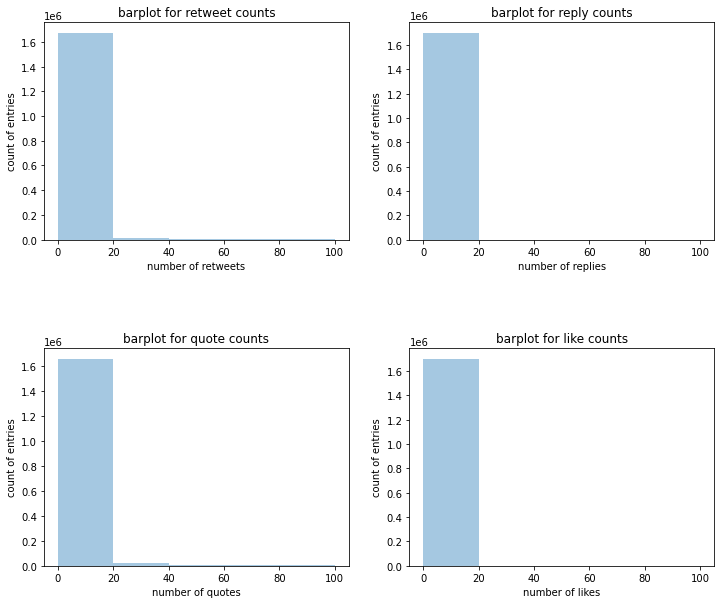

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
sns.distplot(retweet_counts, ax=axes[0, 0], kde=False, bins=[0, 20, 40,  50, 100])
sns.distplot(reply_counts, ax=axes[0, 1], kde=False, bins=[0, 20, 40,  50, 100])
sns.distplot(like_counts, ax=axes[1, 0], kde=False, bins=[0, 20, 40,  50, 100])
sns.distplot(quote_counts, ax=axes[1, 1], kde=False, bins=[0, 20, 40,  50, 100])

axes[0, 0].set_title('barplot for retweet counts')
axes[0, 0].set_xlabel('number of retweets')

axes[0, 1].set_title('barplot for reply counts')
axes[0, 1].set_xlabel('number of replies')

axes[1, 0].set_title('barplot for quote counts')
axes[1, 0].set_xlabel('number of quotes')

axes[1, 1].set_title('barplot for like counts')
axes[1, 1].set_xlabel('number of likes')


for i in [0, 1]:
    for j in [0, 1]:
        axes[i, j].set_ylabel('count of entries')

plt.subplots_adjust(hspace = 0.5)
        

In [30]:
language_counts = Counter(data.language)
most_used_languages = [item[0] for item in language_counts.most_common(5)]
most_used_languages

['en', 'ar', 'es', 'und', 'fr']

Text(0.5, 1.0, 'piechart of languages present in tweets')

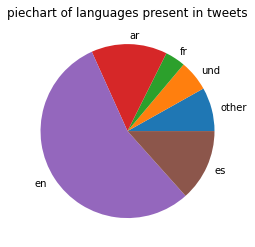

In [35]:
processed_list = [item if item in most_used_languages else 'other' for item in data.language]
language_counts = dict(Counter(processed_list))
plt.pie(list(language_counts.values()), labels=list(language_counts.keys()))
plt.title('piechart of languages present in tweets')